In [147]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [148]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [149]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


sns.countplot(x = 'sex' , hue ='survived', data=df)
plt.title('Survival by gender')
plt.show()

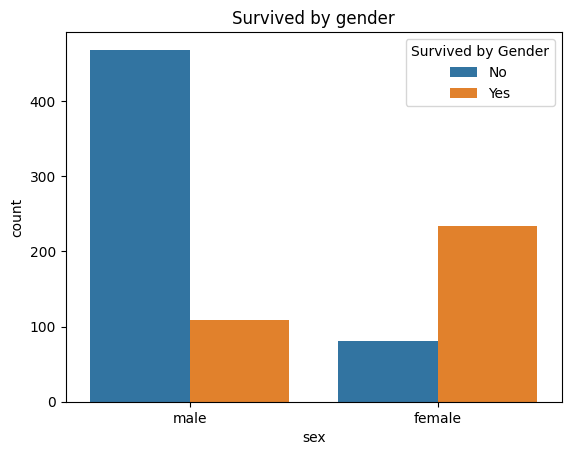

In [150]:
sns.countplot(x = 'sex', hue ='survived', data = df)
plt.title('Survived by gender')
plt.legend(title = 'Survived by Gender', labels = ['No', 'Yes'])
plt.show()

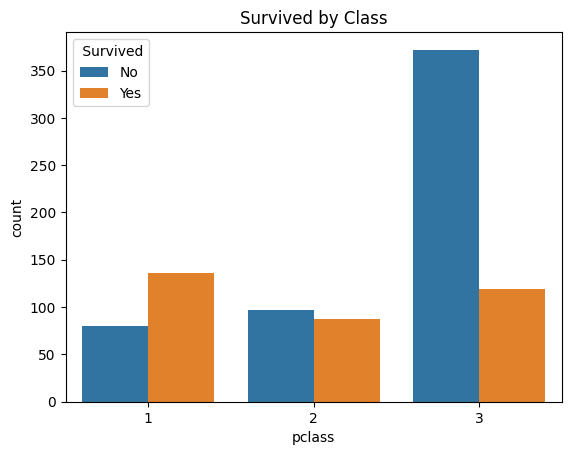

In [151]:
sns.countplot(x = 'pclass', hue ='survived', data = df )
plt.legend(title = ' Survived', labels = ['No', 'Yes'])
plt.title('Survived by Class')
plt.show()

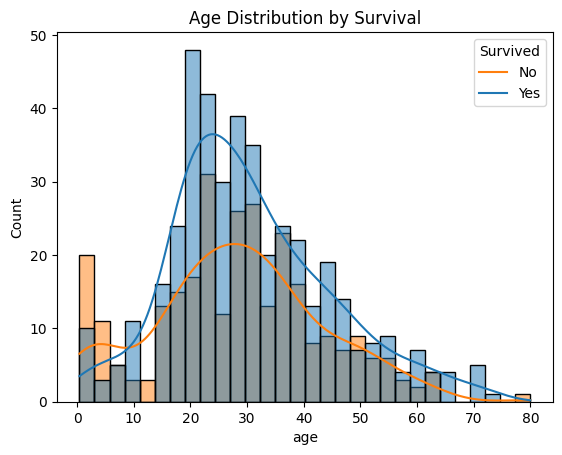

In [152]:
sns.histplot(data = df, x = 'age', hue = 'survived', kde= 'True', bins = 30)
plt.title("Age Distribution by Survival")
plt.legend(title = 'Survived', labels = ['No', 'Yes'])
plt.show()

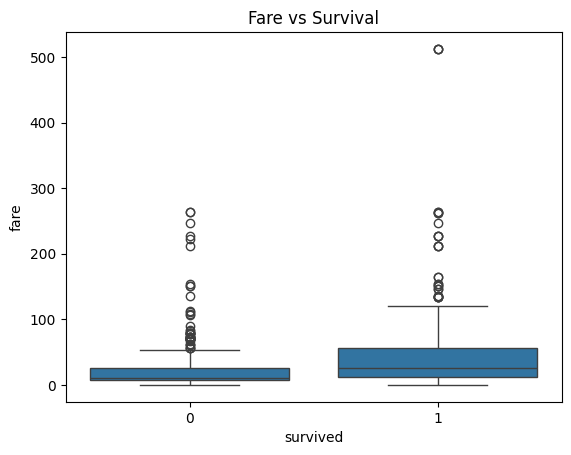

In [153]:
sns.boxplot(x='survived', y='fare', data=df)
plt.title("Fare vs Survival")
plt.show()

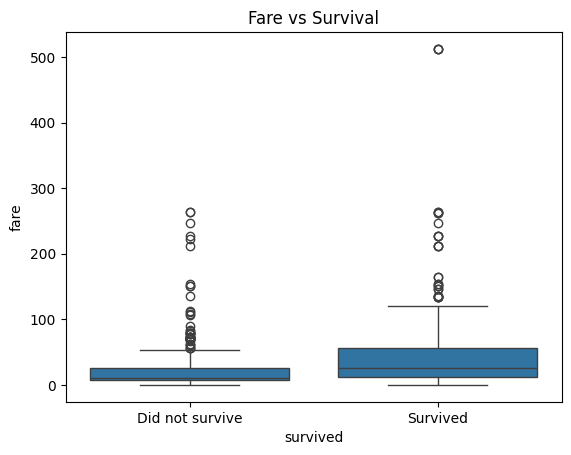

In [154]:
sns.boxplot(x='survived', y='fare', data=df)
plt.title("Fare vs Survival")
plt.xticks([0,1],['Did not survive', 'Survived'])
plt.show()

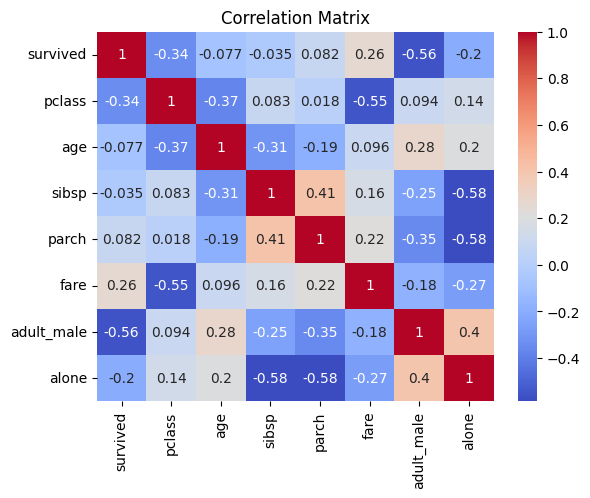

In [155]:
sns.heatmap(df.corr(numeric_only= True), annot = True, cmap ="coolwarm")
plt.title("Correlation Matrix")
plt.show()

```python
df.drop(columns = ['deck', 'embark_town', 'alive', 'who', 'adult_male', 'class', 'alone'], inplace=True)

df.dropna(subset=['age', 'embarked'], inplace=True)


```python
df['sex'] = df['sex'].map({'male':0, 'female':1})
df['embarked'] =df['embarked'].map({'S':0, 'C':1,'Q':2})
df.head()

##### The issue is that when you run the code again, the mapping tries to apply to already-mapped numerical values (0, 1, 2), which don't exist in the mapping dictionary, so they become NaN.
#### The Problem

##### > First run: 'male' → 0, 'female' → 1 ✓
##### > Second run: 0 and 1 are not in the mapping {'male': 0, 'female': 1}, so they become NaN 
##### > better to create a function to avoid this 

In [156]:
def clean_titanic_data(df):
    df_clean = df.copy()
    df_clean.drop(columns = ['deck', 'embark_town', 'alive', 'who', 'adult_male', 'class', 'alone'], inplace=True) 
    df_clean.dropna(subset= ['age', 'embarked'], inplace = True)
    if df_clean['sex'].dtype == 'object':
        df_clean['sex'] == df_clean['sex'].map({'male': 0 , 'female':1})
    elif df_clean['embarked'].dtype == 'object':
        df_clean['embarked'] == df_clean['embarked'].map({'S': 0 , 'C':1, 'Q': 2})
    return df_clean 
df = clean_titanic_data(df)    
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
885,0,3,female,39.0,0,5,29.125,Q
886,0,2,male,27.0,0,0,13.000,S
887,1,1,female,19.0,0,0,30.000,S
889,1,1,male,26.0,0,0,30.000,C
890,0,3,male,32.0,0,0,7.750,Q


In [162]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

features = ['pclass', 'sex', 'fare', 'embarked']
df_encoded = pd.get_dummies(df[features], drop_first=True)
X = df_encoded
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7482517482517482


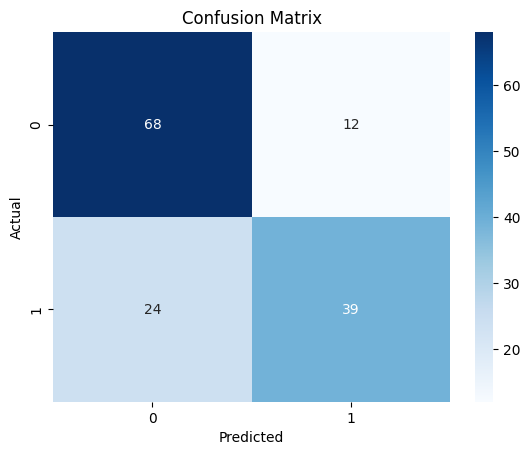

In [164]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [165]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79        80
           1       0.76      0.62      0.68        63

    accuracy                           0.75       143
   macro avg       0.75      0.73      0.74       143
weighted avg       0.75      0.75      0.74       143



In [166]:
results = X_test.copy()
results['Actual'] = y_test
results['Predicted'] = y_pred
results['Correct'] = results['Actual'] == results['Predicted']


In [167]:
wrong_pred = results[results['Correct']== False]
wrong_pred.head()

,pclass,fare,sex_male,embarked_Q,embarked_S,Actual,Predicted,Correct
550,1,110.8833,True,False,False,1,0,False
657,3,15.5000,False,True,False,0,1,False
509,3,56.4958,True,False,True,1,0,False
852,3,15.2458,False,False,False,0,1,False
445,1,81.8583,True,False,True,1,0,False


### Correct vs Age Boxplot

The `results` DataFrame lacks the `age` column, so we need to merge it from `df` before plotting:

In [ ]:

results_with_age = results.copy()
results_with_age['age'] = df.loc[results_with_age.index, 'age']

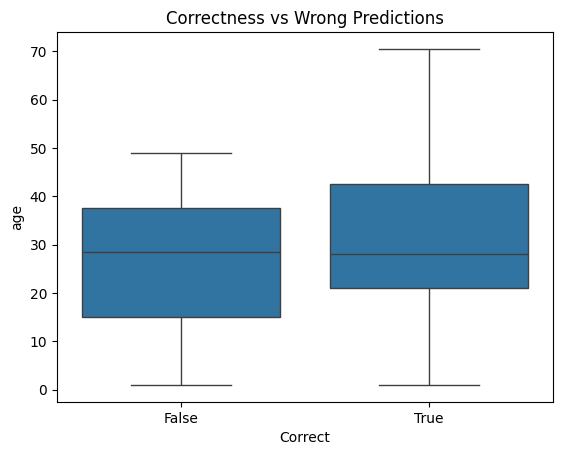

In [ ]:
sns.boxplot(x='Correct', y='age', data=results_with_age)
plt.title('Correct vs Wrong Predictions')
plt.show()